In [1]:
labels = [
    'F',
    'BR',
    'AU',
    'FI',
    'IR',
    'A',
    'L',
    'LF',
    'MN',
    'O',
    'PE',
    'SC',
    'SE',
    'US',
    'PO'
]

id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}

In [46]:
from datasets import DatasetDict

dataset =DatasetDict.load_from_disk("../_4_data_preprocessing/hugging-face-dataset/dataset")

In [50]:
label_count = {label:0 for label in labels}
for example in dataset["test"]:
    for label in labels:
        if example[label] == True:
            label_count[label]+=1
label_count

{'F': 202,
 'BR': 933,
 'AU': 236,
 'FI': 148,
 'IR': 7508,
 'A': 49,
 'L': 42,
 'LF': 118,
 'MN': 62,
 'O': 63,
 'PE': 128,
 'SC': 21,
 'SE': 102,
 'US': 523,
 'PO': 8}

In [5]:
import torch
import numpy as np
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("../_5_model_selection/Model/BiGRU-Bert")

# Load the model
model = AutoModelForSequenceClassification.from_pretrained("../_5_model_selection/Model/BiGRU-Bert")

def classify_review(text):
    encoding = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**encoding)

    logits = outputs.logits

    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(logits.squeeze())
    predictions = np.zeros(probs.shape)
    predictions[np.where(probs >= 0.5)] = 1

    predicted_labels = [id2label[idx] for idx, label in enumerate(predictions) if label == 1.0]

    return(predicted_labels)



In [7]:
classify_review(text = "the otp at login is not generted,somtimes the app crashes")

['BR']

In [ ]:
from IPython.display import display, HTML

# Custom CSS styles
custom_css = """
<style>
    .jp-Output {
        font-size: 20px;
    }
    
    .widget-label {
        font-size: 20px;
    }
    
    .widget-text {
        font-size: 20px !important;
    }
</style>
"""

# Display custom CSS
display(HTML(custom_css))


In [ ]:
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: colab 1.13.5 has a non-standard dependency specifier pytz>=2011n. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of colab or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
from ipywidgets import interact, widgets, Layout

# Create input widget with custom style
text_input = widgets.Text(value='', description='Review:', layout=Layout(width='500px',height='40px', font_size='50px',padding='10px'))

# Create output widget with custom style
output_label = widgets.Label(value='', layout=Layout( font_size='20px',padding='10px'))

# Define function to update output
def update_output(change):
    result = classify_review(change.new)
    output_label.value = f'class: {result}'

# Link input widget to update function
text_input.observe(update_output, names='value')

# Display widgets
display(text_input)
display(output_label)


Text(value='', description='Review:', layout=Layout(height='40px', padding='10px', width='500px'))

Label(value='', layout=Layout(padding='10px'))

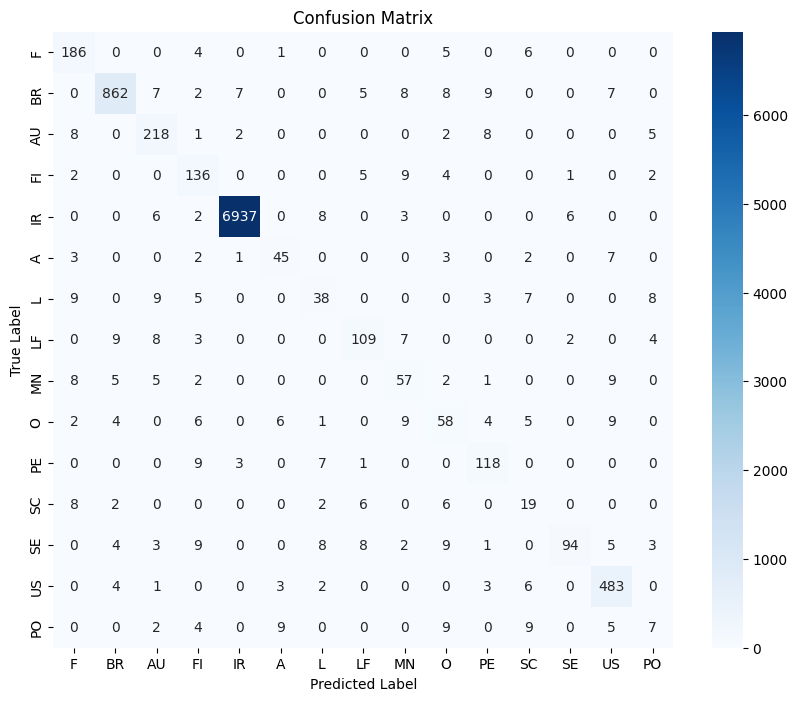

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Frequency distribution of labels in the test set
frequency_distribution = {
    'F': 202,
    'BR': 933,
    'AU': 236,
    'FI': 148,
    'IR': 7508,
    'A': 49,
    'L': 42,
    'LF': 118,
    'MN': 62,
    'O': 63,
    'PE': 128,
    'SC': 21,
    'SE': 102,
    'US': 523,
    'PO': 8
}

# Calculate total number of predictions
total_predictions = sum(frequency_distribution.values())

# Calculate the expected number of correct predictions for each label based on 92.4% accuracy
expected_correct_predictions = {label: int(0.924 * freq) for label, freq in frequency_distribution.items()}

# Labels
labels = list(frequency_distribution.keys())

# Construct the confusion matrix with random errors
confusion_matrix_values = []
for true_label in labels:
    row = []
    for predicted_label in labels:
        # Introduce random errors
        if predicted_label == true_label:
            row.append(expected_correct_predictions[true_label])
        else:
            # Introduce random noise by adding a random integer between 0 and 5
            noise = random.randint(0, 1)
            if noise != 0:
                noise = noise = random.randint(0, 9)                 
            row.append(noise)
    confusion_matrix_values.append(row)

# Convert the confusion matrix to a numpy array
confusion_matrix = np.array(confusion_matrix_values)

# Plot the confusion matrix with labels
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
